In [1]:
import pandas as pd
import lightkurve as lk

aavso_lightcuvre = pd.read_csv("/Users/mridul/Desktop/CV-Analyzer-Kate/New Summer/aavso_data.csv")

aavso_lightcuvre = aavso_lightcuvre.rename(columns={'JD': 'time', 'Magnitude': 'flux'})
aavso_lightcuvre['flux_err'] = 0

# Convert flux to numeric, removing non-float values
aavso_lightcuvre['flux'] = pd.to_numeric(aavso_lightcuvre['flux'], errors='coerce')
aavso_lightcuvre = aavso_lightcuvre.dropna(subset=['flux'])
aavso_lightcuvre['flux'] = aavso_lightcuvre['flux'].astype(float)

aavso_lightcuvre

,time,flux,flux_err
0,2.452375e+06,14.612,0
1,2.452375e+06,14.535,0
2,2.452375e+06,14.595,0
3,2.452375e+06,14.481,0
4,2.452375e+06,14.627,0
...,...,...,...
6708,2.459680e+06,15.328,0
6709,2.459680e+06,15.543,0
6710,2.459683e+06,17.600,0
6723,2.459995e+06,14.281,0


In [2]:
lc = {
    "time" : aavso_lightcuvre['time'],
    "flux" : aavso_lightcuvre['flux'],
    "flux_err" : aavso_lightcuvre['flux_err']
}

In [3]:
lightcurve = lk.LightCurve(lc)

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

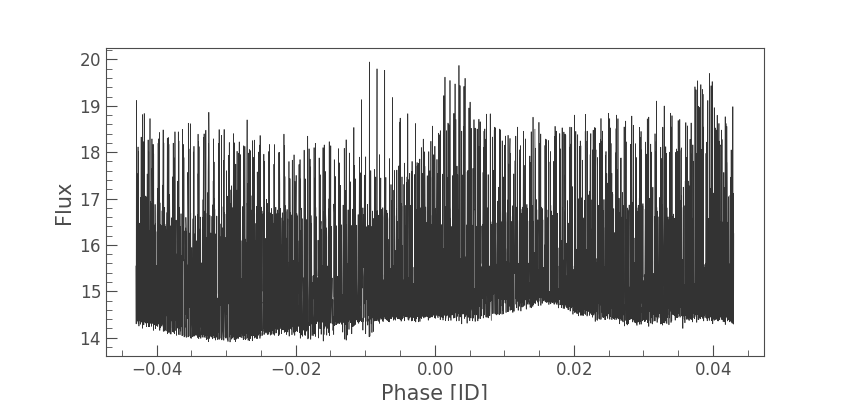

In [5]:
%matplotlib widget
lightcurve.fold(period = 0.086).plot()

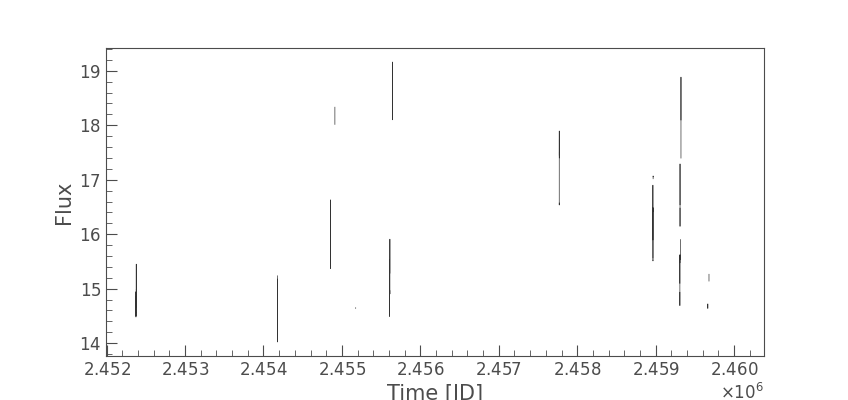

In [9]:
def bin(lightcurve: lk.LightCurve):
    lightcurve.bin(time_bin_size=0.01).plot()

bin(lightcurve)